In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pix2vertex as p2v

matplotlib.rcParams['figure.figsize'] = (13,7)

In [ ]:
# if weights are not downloaded
! chmod u+x ./download.sh
!./download.sh

In [2]:
detector = p2v.Detector('./weights/shape_predictor_68_face_landmarks.dat')
reconstructor = p2v.Reconstructor('./weights/faces_hybrid_and_rotated_2.pth')

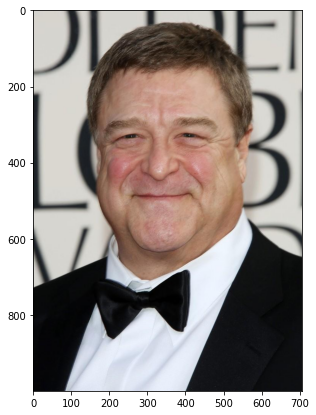

In [3]:
img = io.imread('examples/sample.jpg') # Can read directly from URL as well
fig = plt.figure()
plt.imshow(img)
plt.show()

Detection 0: Left: 161 Top: 204 Right: 546 Bottom: 590


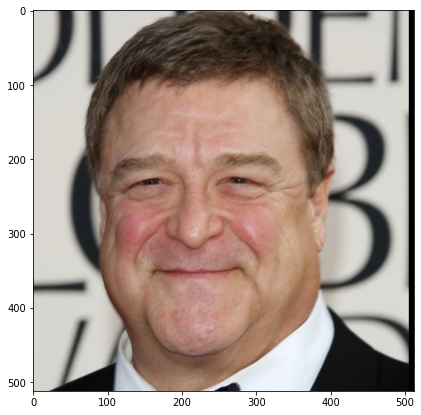

In [4]:
img_crop = detector.detect_and_crop(img)
fig = plt.figure()
plt.imshow(img_crop)
plt.show()

In [10]:
net_res = reconstructor.run_net(img_crop)

torch.Size([1, 3, 512, 512])


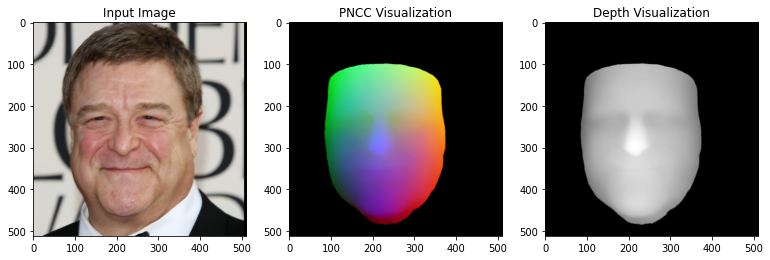

In [11]:
p2v.vis_net_result(img_crop,net_res)

In [12]:
img_crop.shape

(512, 512, 3)

In [13]:
final_res = reconstructor.post_process(net_res)

In [14]:
plot = p2v.vis_depth_interactive(final_res['Z_surface'])

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

In [15]:
plot = p2v.vis_pcloud_interactive(final_res,img_crop)

/home/matan/miniconda3/envs/bella/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))
/home/matan/miniconda3/envs/bella/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

/home/matan/pix2vertex.pytorch/pix2vertex/utils.py:25: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cstride=stride, rstride=stride, linewidth=0, antialiased=False, facecolors=rgb)
/home/matan/miniconda3/envs/bella/lib/python3.7/site-packages/matplotlib/colors.py:306: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/home/matan/miniconda3/envs/bella/lib/python3.7/site-packages/matplotlib/colors.py:306: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


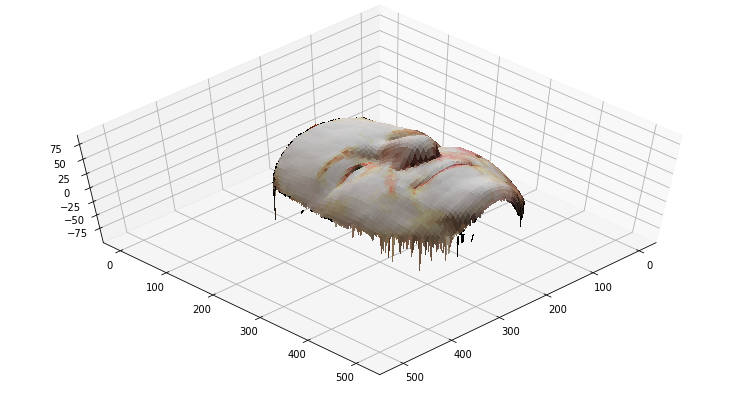

In [16]:
p2v.vis_depth_matplotlib(img_crop,final_res['Z_surface'])

In [18]:
final_res['Z_surface']

array([[-99.05469,       nan,       nan, ...,       nan,       nan,
        -79.78458],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)